In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import fitsio
import os

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
MEDIUM_SIZE = 30
SMALL_SIZE = 22
SSSMALL_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)
os.environ['PATH'] = '/global/common/sw/cray/sles15/x86_64/texlive/live/gcc/8.2.0/tiozj27/bin/x86_64-linux/:{}'.format(os.environ['PATH'])

In [3]:
targetdata = fitsio.read("targets/dark_north.fits")

In [4]:
n = len(targetdata)
print(n)

42348445


In [5]:
is_qso = (targetdata['DESI_TARGET'] & 4)!=0
data_qso = targetdata[is_qso]
print(len(data_qso))

3065704


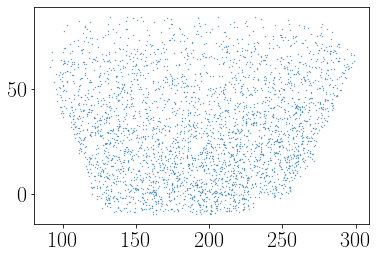

In [6]:
r = np.random.random(len(data_qso))
ii = r<0.001
plt.scatter(data_qso['RA'][ii], data_qso['DEC'][ii], s=0.1)

In [7]:
theta = np.deg2rad(90.0 - data_qso['DEC'])
phi = np.deg2rad(data_qso['RA'])

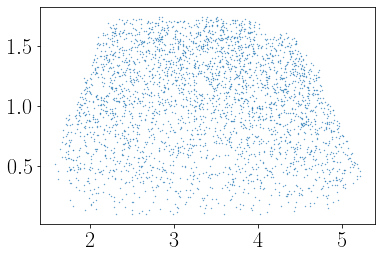

In [8]:
plt.scatter(phi[ii], theta[ii], s=0.1)

In [9]:
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

In [10]:
data = np.array([x,y,z])
data = data.T

In [11]:
np.shape(data)

(3065704, 3)

In [12]:
from sklearn.neighbors import NearestNeighbors

In [13]:
neighbors = NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(data)

In [14]:
dist, ind = neighbors.kneighbors(data)

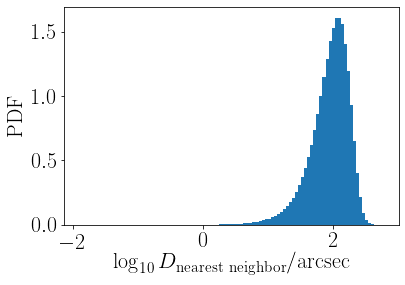

In [15]:
_=plt.hist(np.log10(np.rad2deg(dist[:,1])*3600.0), density=True, bins=100)
plt.xlabel("$\log_{10}  D_{\mathrm{nearest\ neighbor}} / \mathrm{arcsec}$")
plt.ylabel("PDF")

#_ = plt.xticks(ticks=np.arange(0,2.2,0.5))

plt.savefig("DR8_qso_distro.pdf", bbox_inches='tight')

In [16]:
d_arcsec = np.rad2deg(dist[:,1])*3600.0

In [17]:
ii = d_arcsec<10.0

In [18]:
d = data_qso[['TARGETID', 'RA', 'DEC']][ii]

In [19]:
np.savetxt('qso_pairs_north.dat', d.T, fmt='%d %f %f')

In [ ]:
d[5]